# In this notebook we will cover : project based on whether a person visits a website and whether he / she buys a product or not.

* Hypothesis for classification
* logistic Regression
* Cost for classification
* Accuracy

# Cost function in logistic function is not of covex shape so, we use sigmoid function and cost function is given as:

# ci = - (1-yi) log(1-yi_hat) - yi log(yi_hat)

# OR 

**ci = -log(1-yi_hat)      for yi =0**

**ci = - log(yi_hat)       for yi =1** 


where ** y_hat ** is described as
  
  # y_hat = f(b + X * w)

In [39]:
# Importing Dependencies

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv('user_visit_duration.csv')

In [42]:
# Exploring Data

In [43]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Time (min)    100 non-null float64
Buy           100 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [45]:
df.describe()

,Time (min),Buy
count,100.000000,100.000000
mean,1.849000,0.500000
std,1.073868,0.502519
min,0.000000,0.000000
25%,1.066667,0.000000
50%,1.858333,0.500000
75%,2.687500,1.000000
max,4.150000,1.000000


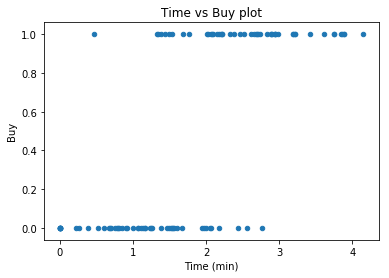

In [46]:
# VISUALIZING DATA

df.plot(kind = 'scatter', x = 'Time (min)',y = 'Buy' , title ='Time vs Buy plot')

In [47]:
from keras.models import Sequential  # sequential because we will be adding elements to this model in a sequence. 
from keras.layers import Dense       
from keras.optimizers import Adam, SGD # helps to change the values of w and b to get to the minimum cost.

In [48]:
model = Sequential()

In [49]:
model.add(Dense(1, input_shape=(1,), activation = 'sigmoid'))

In [50]:
model.compile(SGD(lr = 0.5), 'binary_crossentropy', metrics =['accuracy'])

# here, loss(cost_function) is binary_crossentropy

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [52]:
X = df[['Time (min)']].values

In [53]:
y = df[['Buy']].values

In [54]:
model.fit(X, y ,epochs = 25)  # applying iterations

# we see that loss is going down while accuracy is going up

Epoch 1/25
100/100 [==============================] - 0s 3ms/step - loss: 0.6498 - acc: 0.5600
Epoch 2/25
100/100 [==============================] - 0s 252us/step - loss: 0.6201 - acc: 0.5900
Epoch 3/25
100/100 [==============================] - 0s 155us/step - loss: 0.5538 - acc: 0.8000
Epoch 4/25
100/100 [==============================] - 0s 130us/step - loss: 0.5354 - acc: 0.7500
Epoch 5/25
100/100 [==============================] - 0s 222us/step - loss: 0.5219 - acc: 0.7600
Epoch 6/25
100/100 [==============================] - 0s 172us/step - loss: 0.4987 - acc: 0.7700
Epoch 7/25
100/100 [==============================] - 0s 137us/step - loss: 0.4864 - acc: 0.7700
Epoch 8/25
100/100 [==============================] - 0s 170us/step - loss: 0.4679 - acc: 0.8300
Epoch 9/25
100/100 [==============================] - 0s 167us/step - loss: 0.4604 - acc: 0.8200
Epoch 10/25
100/100 [==============================] - 0s 190us/step - loss: 0.4720 - acc: 0.8300
Epoch 11/25
100/100 [==========

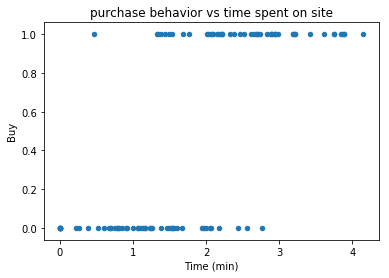

In [55]:
ax = df.plot(kind = 'scatter', x ='Time (min)',y = 'Buy',title = 'purchase behavior vs time spent on site')

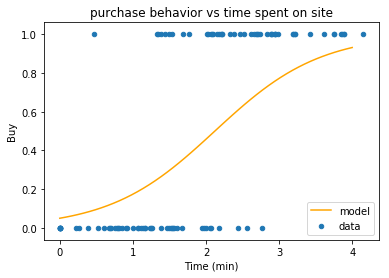

In [56]:
ax = df.plot(kind = 'scatter', x ='Time (min)',y = 'Buy',title = 'purchase behavior vs time spent on site')

temp = np.linspace(0,4)
ax.plot(temp, model.predict(temp), color = 'orange')
plt.legend(['model','data'])

In [57]:
# predicting classes i.e class 0 or class 1

temp_class =model.predict(temp) > 0.5

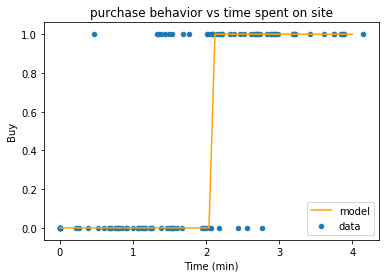

In [58]:
ax = df.plot(kind = 'scatter', x ='Time (min)',y = 'Buy',title = 'purchase behavior vs time spent on site')

temp = np.linspace(0,4)
ax.plot(temp,temp_class, color = 'orange')
plt.legend(['model','data'])

In [59]:
# checking accuracy of model

y_pred = model.predict(X)
y_class_pred = y_pred >0.5


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.820


# Train/Test split

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
# Resetting Weights

params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [64]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [65]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [66]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.812
The test accuracy score is 0.850


# CROSS_VALIDATION

In [67]:
from keras.wrappers.scikit_learn import KerasClassifier

# wrappers allows us to use keras model in scikit learn

In [68]:
# Creating a model

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape =(1,),activation ='sigmoid'))
    model.compile(SGD(lr = 0.5),'binary_crossentropy',metrics=['accuracy'])
    return model

In [75]:
model = KerasClassifier(build_fn = build_logistic_regression_model,epochs = 25,verbose =0)

# wrapper needs a build function to work

In [70]:
from sklearn.model_selection import cross_val_score,KFold

In [71]:
# cross_validation
# dividing data in 3 equal subsets
cv = KFold(3, shuffle=True)

In [72]:
scores = cross_val_score(model, X, y, cv=cv)

Epoch 1/25
66/66 [==============================] - 0s 5ms/step - loss: 0.7095 - acc: 0.6061
Epoch 2/25
66/66 [==============================] - 0s 91us/step - loss: 0.6292 - acc: 0.6061
Epoch 3/25
66/66 [==============================] - 0s 91us/step - loss: 0.5714 - acc: 0.7576
Epoch 4/25
66/66 [==============================] - 0s 151us/step - loss: 0.5208 - acc: 0.7576
Epoch 5/25
66/66 [==============================] - 0s 106us/step - loss: 0.5155 - acc: 0.8030
Epoch 6/25
66/66 [==============================] - 0s 136us/step - loss: 0.5043 - acc: 0.8030
Epoch 7/25
66/66 [==============================] - 0s 151us/step - loss: 0.4922 - acc: 0.8182
Epoch 8/25
66/66 [==============================] - 0s 136us/step - loss: 0.4773 - acc: 0.8182
Epoch 9/25
66/66 [==============================] - 0s 106us/step - loss: 0.5102 - acc: 0.7424
Epoch 10/25
66/66 [==============================] - 0s 136us/step - loss: 0.4649 - acc: 0.8030
Epoch 11/25
66/66 [==============================] - 

In [73]:
scores # checking values for 3 subsets

array([0.73529412, 0.81818182, 0.84848485])

In [74]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8007 ± 0.0478


# Confusion Matrix

In [76]:
#Importing Confusion Matrix\

from sklearn.metrics import confusion_matrix


In [77]:
confusion_matrix(y,y_class_pred)

# it gives 46 true negatives and 36 true positives

array([[46,  4],
       [14, 36]], dtype=int64)

In [89]:
# Helper function to pretify the Confusion Matrix

def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [90]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,46,4
Buy,14,36


In [91]:
# Predicting F1 score, Recall and Precision

from sklearn.metrics import precision_score, recall_score, f1_score


In [92]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.900
Recall:  	0.720
F1 Score:	0.800


In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.77      0.92      0.84        50
          1       0.90      0.72      0.80        50

avg / total       0.83      0.82      0.82       100



# Feature Preprocessing

# Categorical Features

In [99]:
df = pd.read_csv('weight-height.csv')

In [96]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [102]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [103]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [101]:
pd.get_dummies(df['Gender'], prefix = 'Gender').head()

# get_dummies create as many columns as df

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [104]:
# FEATURE TRANSFORMATION

In [105]:
# 1) Rescale with fixed factor

df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [107]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


In [108]:
# MaxMin Normalization
# implementing minimum and maximum value scaler

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


In [110]:
# 3) Standard normalization

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


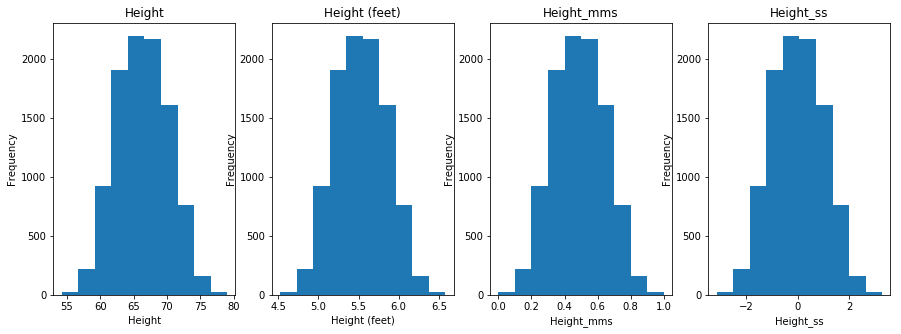

In [111]:
# plotting histogram of features ...they all look the same just their scales are diffrent

plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)